In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import pickle

import warnings
warnings.filterwarnings("ignore")

In [71]:
data = pd.read_csv('Data/Major_Crime_Indicators.csv')
data.tail()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,cleared,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
301228,-8.844901e+06,5.433057e+06,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,179.0,Tuesday,20,NO,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8.820395e+06,5.430803e+06,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,179.0,Tuesday,21,NO,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8.825525e+06,5.429271e+06,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,140.0,Friday,12,YES,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000000e+00,0.000000e+00,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,180.0,Wednesday,0,NO,Auto Theft,NSA,NSA,0.000000,0.000000,301232
301232,-8.854585e+06,5.426966e+06,301117,GO-20221236298,D31,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,180.0,Wednesday,16,NO,Auto Theft,22,Humbermede,-79.542092,43.750849,301233


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301233 entries, 0 to 301232
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    301233 non-null  float64
 1   Y                    301233 non-null  float64
 2   Index_               301233 non-null  int64  
 3   event_unique_id      301233 non-null  object 
 4   Division             301233 non-null  object 
 5   occurrencedate       301233 non-null  object 
 6   reporteddate         301233 non-null  object 
 7   location_type        301233 non-null  object 
 8   premises_type        301233 non-null  object 
 9   ucr_code             301233 non-null  int64  
 10  ucr_ext              301233 non-null  int64  
 11  offence              301233 non-null  object 
 12  reportedyear         301233 non-null  int64  
 13  reportedmonth        301233 non-null  object 
 14  reportedday          301233 non-null  int64  
 15  reporteddayofyear

#### Followig columns contain NULL values

In [73]:
# Look for the NULL values
null_values = data.isna().sum()[data.isna().sum() != 0]
null_values_columns = null_values.index
display(null_values)

occurrenceyear         100
occurrencemonth        100
occurrenceday          100
occurrencedayofyear    100
occurrencedayofweek    100
dtype: int64

### We will process the null values with appropriate methods now

In [74]:
data[null_values_columns].head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek
0,2014.0,January,3.0,3.0,Friday
1,2014.0,January,3.0,3.0,Friday
2,2014.0,January,3.0,3.0,Friday
3,2014.0,January,3.0,3.0,Friday
4,2014.0,January,3.0,3.0,Friday


### The best way to process the above columns is to remove the rows containing NULL values. The reason for this action is that, the column are representing time and filling the absent values based on anyaggregate function would be potentially wrong. Also the columns contain significantly low amount of NULL values so we can avoid them without worrying too much abou the loss of data.

In [75]:
data.dropna(inplace = True)
data.isna().sum()[data.isna().sum() != 0]

Series([], dtype: int64)

# Now lets perform some basinc visualizations to understand our data

## The variation of the number of crimes per year

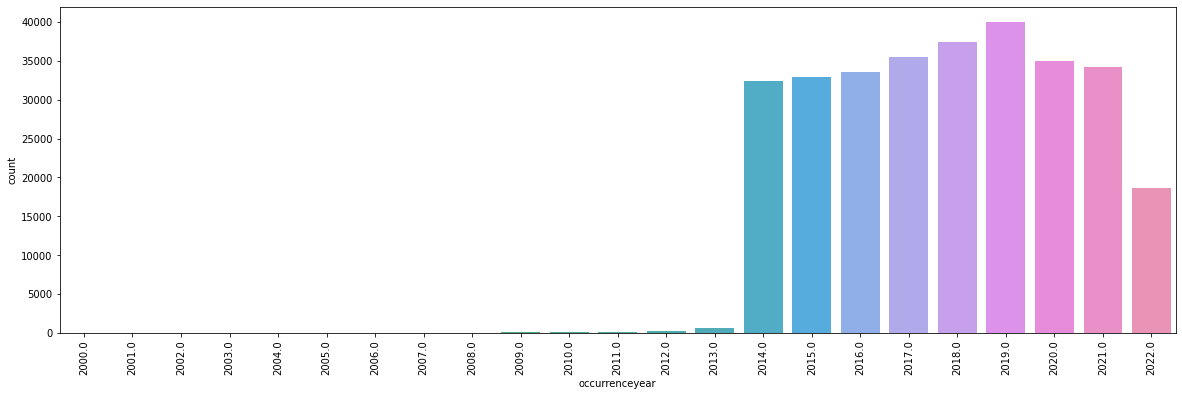

In [76]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'occurrenceyear', data = data)
plt.xticks(rotation = 90)
plt.show()

#### The overall variation show a slight increase the no of crimes per year, from 2014 to 2021
#### Before 2014 the no of record for the crimes are significantly low, the reason for this might be the absence of the data itself, because the abrupt change in the number of crimes is almost impractical.
#### For the year 2022 the number of crimes is low the reasong for that is the absence of the data for a part of the year.
#### But we can clealy see that there is certain dicrease in the trend at year 2020 the is because Covid-19

## The variation of the number of crimes per year for each crime

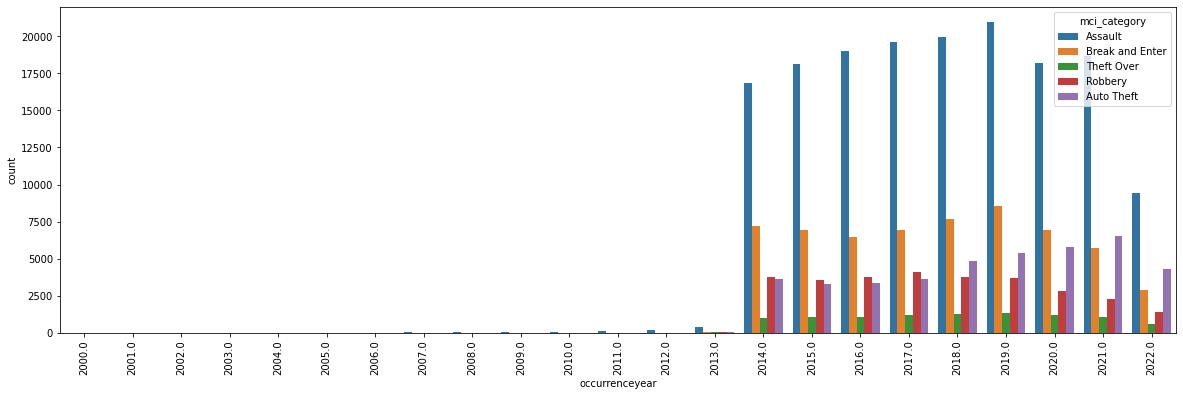

In [77]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'occurrenceyear', data = data, hue = 'mci_category')
plt.xticks(rotation = 90)
plt.show()

#### For all the different type of major crime the trend drops during covide crisis, except for Theft over and Auto theft
#### For the Theft Over and Auto Theft the trend seem to keep increasing, reason being the abandonment of the properties

## The variation of the number of crimes per month

In [78]:
months = ['January', 'February', 'March',
            'April', 'May', 'June', 
            'July', 'August', 'September', 
            'October', 'November', 'December']

incedent_by_months = data.groupby('occurrencemonth').count().loc[months, 'X']

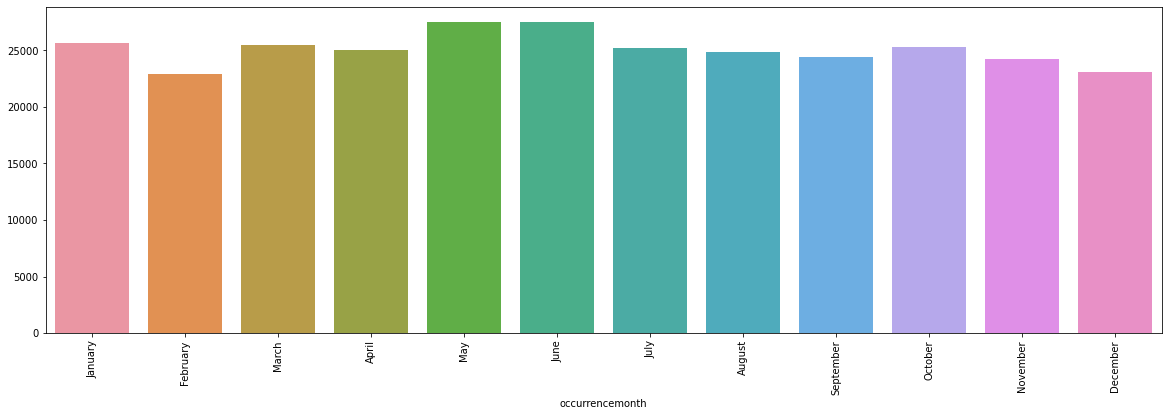

In [79]:
plt.figure(figsize = (20, 6))
sns.barplot(x = incedent_by_months.index, y = incedent_by_months.values)
plt.xticks(rotation = 90)
plt.show()

#### The dicreasing increasing and then again dicreasing pattern can be clearly seen in the graph.
#### The highest occurences are recorded in the month of June, May.

## The variation of the number of crimes per month for each year

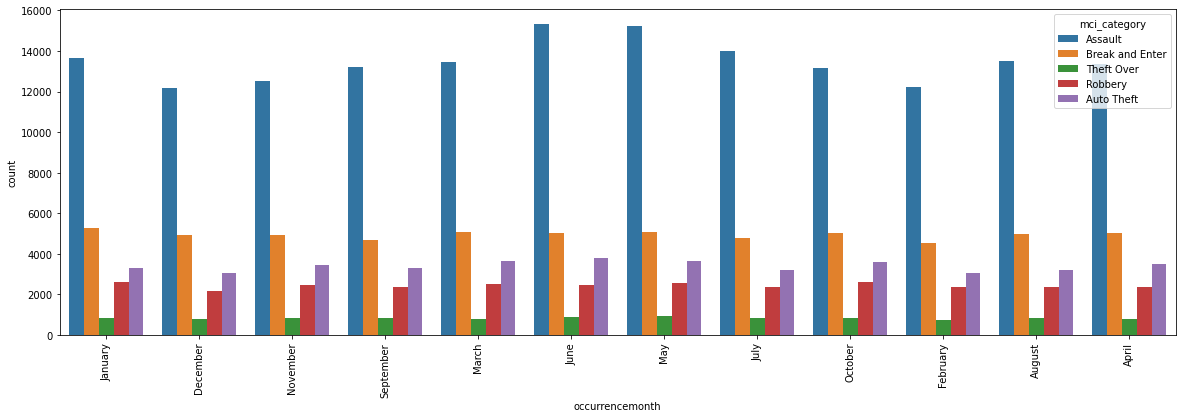

In [80]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'occurrencemonth', data = data, hue = 'mci_category')
plt.xticks(rotation = 90)
plt.show()

#### Just like the yearly analysis the problems because of the Theft over and Auto theft are not changing with the pattern a lot

## The variation of the number of crimes per day of month

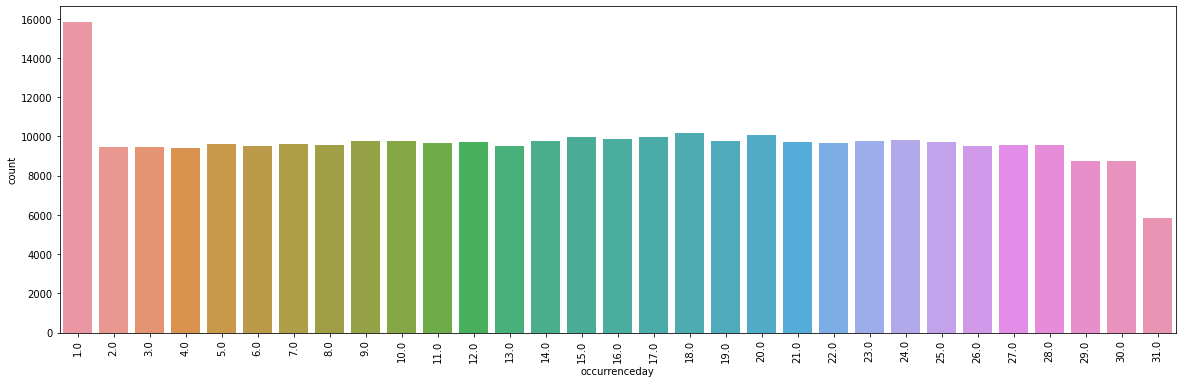

In [81]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'occurrenceday', data = data)
plt.xticks(rotation = 90)
plt.show()

### The variation of the number of crimes per day of week

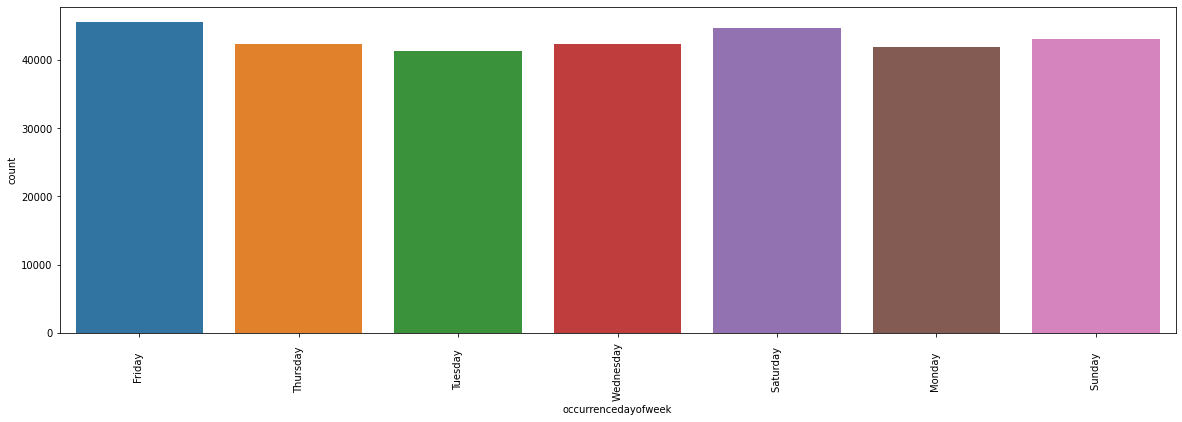

In [82]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'occurrencedayofweek', data = data)
plt.xticks(rotation = 90)
plt.show()

## Filter the location columns
#### In some locations the latitude and longitude are 0.000 and 0.000 which ar enot valid so we will remove those columns from our data

In [83]:
data = data[data['Longitude'] != 0]

In [84]:
# # It is necessary to understand the areas whichare affected by the crime in the city

# loc_count = data[['Longitude','Latitude']].value_counts()
# Longitude = np.array([a for a, _ in loc_count.index])
# Latitude = np.array([b for _, b in loc_count.index])
# count_crimes = loc_count.values

# fig = px.density_mapbox(lat=Latitude, lon=Longitude, z=count_crimes, radius=10,
#                         center=dict(lat=43.717, lon=-79.39906), zoom=9.5, width=800, height=800,
#                         mapbox_style="stamen-terrain",
#                         title="Number of incidents in each area")
# fig.show()

In [85]:
# # the plot of no of incidents by each year
# for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
#     loc_count = data[data['occurrenceyear'] == year][['Longitude','Latitude']].value_counts()
#     Longitude = np.array([a for a, _ in loc_count.index])
#     Latitude = np.array([b for _, b in loc_count.index])
#     count_crimes = loc_count.values

#     fig = px.density_mapbox(lat = Latitude, lon = Longitude, z = count_crimes, radius = 10,
#                             center = dict(lat = 43.717, lon = -79.39906), zoom = 9.5, width = 800, height = 800,
#                             mapbox_style = "stamen-terrain",
#                             title = f"Number of incidents in each area in year {year}")
#     fig.show()

## Location type which has highest crimes

In [86]:
data.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'cleared', 'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude',
       'Latitude', 'ObjectId'],
      dtype='object')

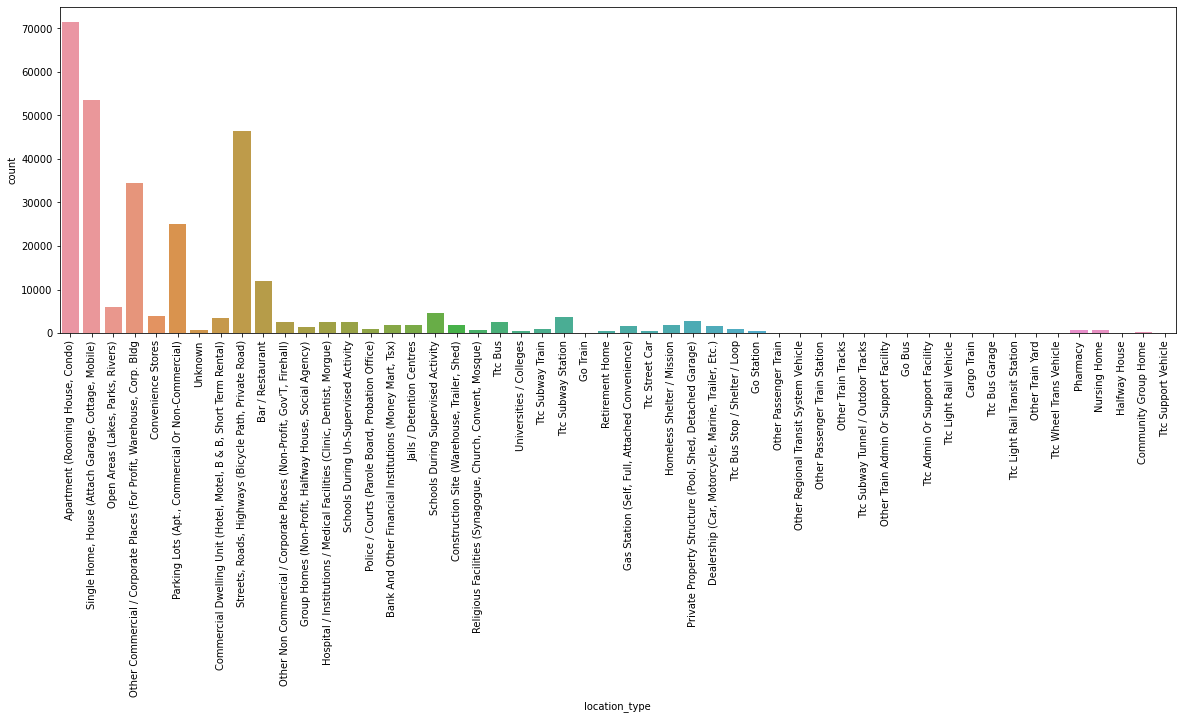

In [87]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'location_type', data = data)
plt.xticks(rotation = 90)
plt.show()

## Location type which has highest crimes alongside with the major crime categories

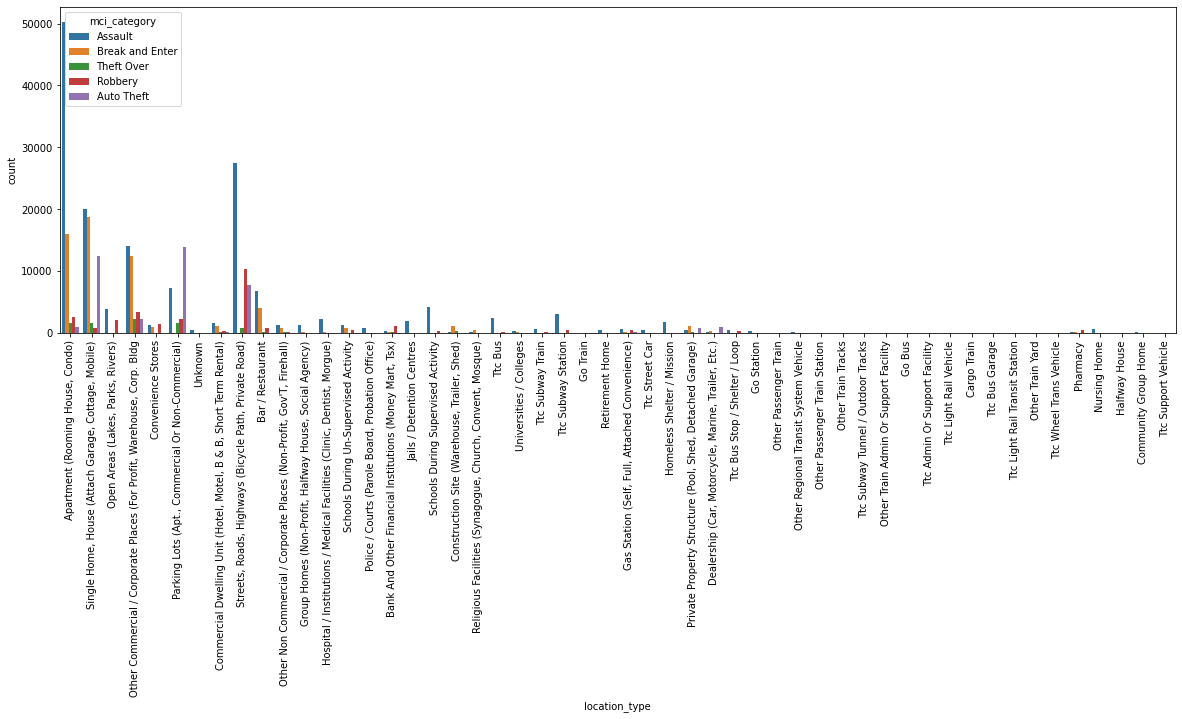

In [88]:
plt.figure(figsize = (20, 6))
sns.countplot(x = 'location_type', data = data, hue = 'mci_category')
plt.xticks(rotation = 90)
plt.show()

# Data Preprocessing

## Recognise the object based columns and transform them to numerical columns

In [89]:
# Separate the object based columns
object_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        object_cols.append(col)


data[object_cols].head()

,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,offence,reportedmonth,reporteddayofweek,occurrencemonth,occurrencedayofweek,cleared,mci_category,Hood_ID,Neighbourhood
0,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,Assault,January,Friday,January,Friday,NO,Assault,27,York University Heights
1,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,January,Friday,January,Friday,NO,Break and Enter,132,Malvern
2,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault,January,Friday,January,Friday,NO,Assault,19,Long Branch
3,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Theft Over,January,Friday,January,Friday,YES,Theft Over,55,Thorncliffe Park
4,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,Robbery - Business,January,Friday,January,Friday,NO,Robbery,14,Islington-City Centre West


### unique_id is irrelevent so we will drop it
### Also drop Hood_ID since it is duplicated as Neighbourhood
### The first two columns Index_, X and Y are irrelevent
### Object_Id is just a unique number manually assigned to reports so remove it as well.

In [90]:
data.drop(['reporteddate', 'occurrencedate', 'event_unique_id', 'Hood_ID', 'X', 'Y', 'Index_', 'ObjectId', ], axis = 1, inplace = True)

### Process the output column into a numerical format

In [91]:
dict_unique_mci_category = dict(((b,a) for (a,b) in enumerate(set(data['mci_category']))))
dict_unique_mci_category_invert = {b:a for a,b in dict_unique_mci_category.items()}
data['mci_category'] = [dict_unique_mci_category[item] for item in data['mci_category']]
data.head()

,Division,location_type,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,cleared,mci_category,Neighbourhood,Longitude,Latitude
0,D31,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,2014,January,3,3,...,January,3.0,3.0,Friday,11,NO,0,York University Heights,-79.504475,43.766371
1,D42,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,200,B&E,2014,January,3,3,...,January,3.0,3.0,Friday,14,NO,1,Malvern,-79.217083,43.814861
2,D22,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,100,Assault,2014,January,3,3,...,January,3.0,3.0,Friday,13,NO,0,Long Branch,-79.534957,43.589085
3,D53,Other Commercial / Corporate Places (For Profi...,Commercial,2130,210,Theft Over,2014,January,3,3,...,January,3.0,3.0,Friday,12,YES,3,Thorncliffe Park,-79.346588,43.703212
4,D22,Convenience Stores,Commercial,1610,210,Robbery - Business,2014,January,3,3,...,January,3.0,3.0,Friday,14,NO,4,Islington-City Centre West,-79.531916,43.645247


In [92]:
# Recheck the duplicate columns
def strip_spaces(x):
    return x.strip()

object_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].apply(strip_spaces)
        object_cols.append(col)


data[object_cols].head()

,Division,location_type,premises_type,offence,reportedmonth,reporteddayofweek,occurrencemonth,occurrencedayofweek,cleared,Neighbourhood
0,D31,"Apartment (Rooming House, Condo)",Apartment,Assault,January,Friday,January,Friday,NO,York University Heights
1,D42,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,January,Friday,January,Friday,NO,Malvern
2,D22,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault,January,Friday,January,Friday,NO,Long Branch
3,D53,Other Commercial / Corporate Places (For Profi...,Commercial,Theft Over,January,Friday,January,Friday,YES,Thorncliffe Park
4,D22,Convenience Stores,Commercial,Robbery - Business,January,Friday,January,Friday,NO,Islington-City Centre West


In [93]:
data_mode = data.mode(axis = 0).iloc[0, :]
dict(data_mode[data_mode.notnull()])

{'Division': 'D51',
 'location_type': 'Apartment (Rooming House, Condo)',
 'premises_type': 'Outside',
 'ucr_code': 1430,
 'ucr_ext': 100,
 'offence': 'Assault',
 'reportedyear': 2019,
 'reportedmonth': 'May',
 'reportedday': 18,
 'reporteddayofyear': 1,
 'reporteddayofweek': 'Monday',
 'reportedhour': 15,
 'occurrenceyear': 2019.0,
 'occurrencemonth': 'May',
 'occurrenceday': 1.0,
 'occurrencedayofyear': 1.0,
 'occurrencedayofweek': 'Friday',
 'occurrencehour': 0,
 'cleared': 'NO',
 'mci_category': 0,
 'Neighbourhood': 'Waterfront Communities-The Island',
 'Longitude': -79.51578755,
 'Latitude': 43.61208553}

In [100]:
data['offence'].unique()

array(['Assault', 'B&E', 'Theft Over', 'Robbery - Business',
       'Theft From Motor Vehicle Over', "B&E W'Intent",
       'Assault - Force/Thrt/Impede', 'Assault Peace Officer',
       'Assault With Weapon', 'Theft Of Motor Vehicle',
       'Assault - Resist/ Prevent Seiz', 'Robbery - Other',
       'Pointing A Firearm', 'Robbery With Weapon', 'Aggravated Assault',
       'Assault Bodily Harm', 'Robbery - Mugging',
       'Robbery - Financial Institute', 'Unlawfully In Dwelling-House',
       'Robbery - Swarming', 'Discharge Firearm With Intent',
       'Robbery - Vehicle Jacking', 'Robbery - Purse Snatch',
       'Crim Negligence Bodily Harm', 'Discharge Firearm - Recklessly',
       'Theft From Mail / Bag / Key', 'Assault Peace Officer Wpn/Cbh',
       'Robbery - Home Invasion', 'Robbery - Taxi',
       'Unlawfully Causing Bodily Harm', 'Robbery - Armoured Car',
       'B&E Out', 'Theft Over - Shoplifting',
       'Use Firearm / Immit Commit Off', 'Robbery - Delivery Person',
     

In [59]:
a.strip()

'Friday'

In [60]:
# I will convert all the other columns into numerical format by label encoding
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in object_cols:
    encoders[col] = LabelEncoder().fit(data[col])

    data[col] = encoders[col].transform(data[col])

data.head()

,Division,location_type,premises_type,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,cleared,mci_category,Neighbourhood,Longitude,Latitude
0,6,0,0,1430,100,5,2014,4,3,3,...,4,3.0,3.0,0,11,0,0,139,-79.504475,43.766371
1,10,36,3,2120,200,12,2014,4,3,3,...,4,3.0,3.0,0,14,0,1,73,-79.217083,43.814861
2,4,19,5,1430,100,5,2014,4,3,3,...,4,3.0,3.0,0,13,0,0,72,-79.534957,43.589085
3,14,20,1,2130,210,43,2014,4,3,3,...,4,3.0,3.0,0,12,1,3,119,-79.346588,43.703212
4,4,7,1,1610,210,25,2014,4,3,3,...,4,3.0,3.0,0,14,0,4,58,-79.531916,43.645247


In [61]:
pickle.dump(encoders, open('saved_models/LabelEncoder', 'wb'))

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297263 entries, 0 to 301232
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Division             297263 non-null  int64  
 1   location_type        297263 non-null  int64  
 2   premises_type        297263 non-null  int64  
 3   ucr_code             297263 non-null  int64  
 4   ucr_ext              297263 non-null  int64  
 5   offence              297263 non-null  int64  
 6   reportedyear         297263 non-null  int64  
 7   reportedmonth        297263 non-null  int64  
 8   reportedday          297263 non-null  int64  
 9   reporteddayofyear    297263 non-null  int64  
 10  reporteddayofweek    297263 non-null  int64  
 11  reportedhour         297263 non-null  int64  
 12  occurrenceyear       297263 non-null  float64
 13  occurrencemonth      297263 non-null  int64  
 14  occurrenceday        297263 non-null  float64
 15  occurrencedayofye

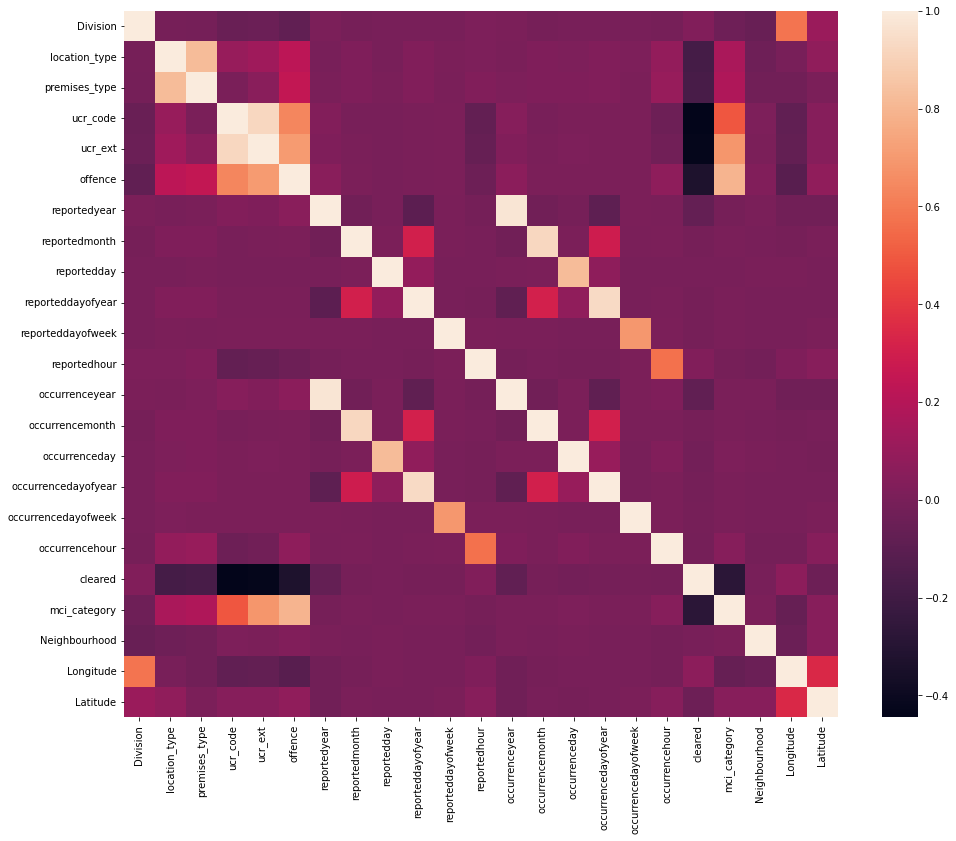

In [63]:
plt.figure(figsize = (16, 13))
sns.heatmap(data.corr())
plt.show()

## Split the data into training and testing sets

In [64]:
len(data.columns)

23

In [65]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler

scaler = StandardScaler()
encoder = OneHotEncoder()


# X = data.drop('mci_category', axis = 1)
# y = label_binarize(data['mci_category'], classes=[0, 1, 2, 3, 4])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X = data.drop('mci_category', axis = 1)
scaler.fit(X)
pickle.dump(scaler, open('saved_models/StandardScaler', 'wb'))
X = scaler.transform(X)

y = data['mci_category']
encoder.fit(np.array(y).reshape(-1, 1))
pickle.dump(scaler, open('saved_models/OneHotEncoder', 'wb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
dict_unique_mci_category_invert

{0: 'Assault',
 1: 'Break and Enter',
 2: 'Auto Theft',
 3: 'Theft Over',
 4: 'Robbery'}

## Making the model

In [67]:
# defined function to test the model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc




def get_results(model, y_test, X_test):
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    
    y_oneHot = encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()
    
    prob_pred = model.predict_proba(X_test)
    
    n_classes = y_oneHot.shape[1]
    macro_roc_auc_ovo = roc_auc_score(y_oneHot, prob_pred, multi_class="ovo",
                                        average="macro")
    weighted_roc_auc_ovo = roc_auc_score(y_oneHot, prob_pred, multi_class="ovo",
                                        average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_oneHot, prob_pred, multi_class="ovr",
                                        average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_oneHot, prob_pred, multi_class="ovr",
                                        average="weighted")
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
            "(weighted by prevalence)"
            .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
            "(weighted by prevalence)"
            .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_oneHot[:, i], prob_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'performance of the model {dict_unique_mci_category_invert[i]}')
        plt.legend(loc="lower right")
        plt.show()

## Now we will create the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39814
           1       0.98      0.97      0.98     14614
           2       0.90      0.98      0.94     10190
           3       0.79      0.55      0.65      2406
           4       1.00      1.00      1.00      7292

    accuracy                           0.98     74316
   macro avg       0.94      0.90      0.91     74316
weighted avg       0.98      0.98      0.98     74316

One-vs-One ROC AUC scores:
0.996348 (macro),
0.998878 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.996348 (macro),
0.998878 (weighted by prevalence)


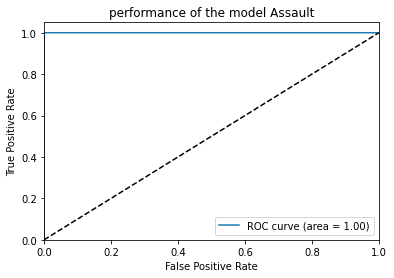

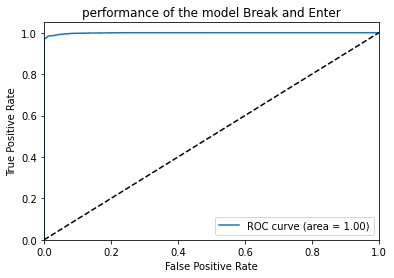

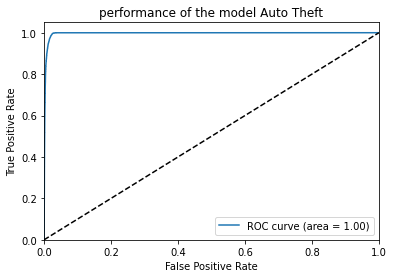

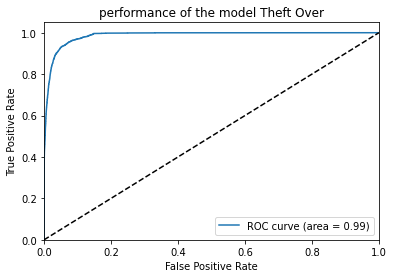

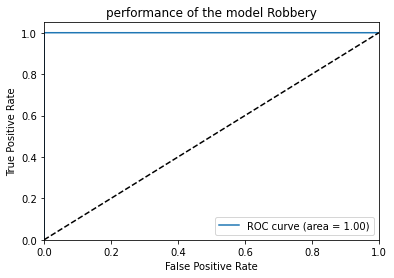

In [68]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()

lr1.fit(X_train, y_train)
pickle.dump(lr1, open('saved_models/LogisticRegression', 'wb'))

pred = lr1.predict(X_test)

get_results(lr1, y_test, X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39814
           1       1.00      1.00      1.00     14614
           2       1.00      1.00      1.00     10190
           3       1.00      1.00      1.00      2406
           4       1.00      1.00      1.00      7292

    accuracy                           1.00     74316
   macro avg       1.00      1.00      1.00     74316
weighted avg       1.00      1.00      1.00     74316

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


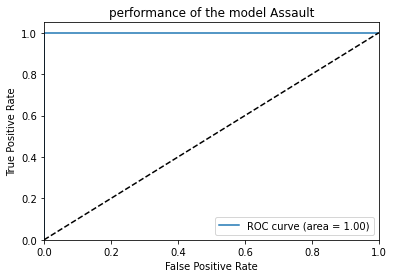

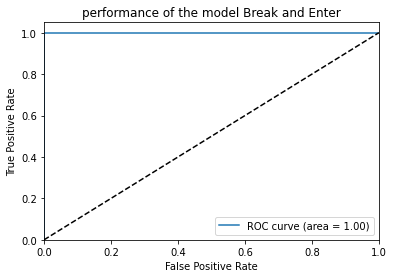

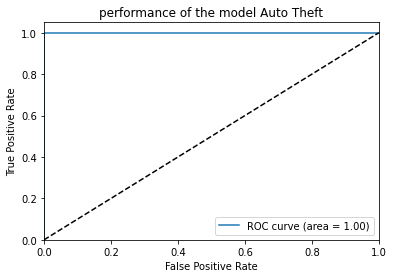

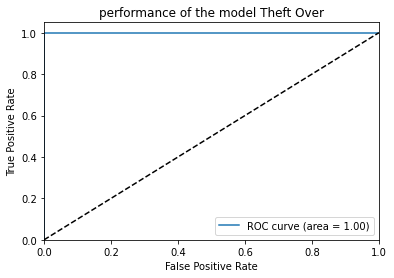

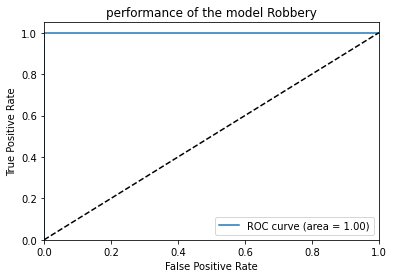

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)
pickle.dump(dtree, open('saved_models/DecisionTreeClassifier', 'wb'))

pred = dtree.predict(X_test)

get_results(dtree, y_test, X_test)